<a href="https://colab.research.google.com/github/sayanpal438/Autumn_Internship_-_Section_1-1-/blob/main/Copy_of_10_unsupervised_learning_with_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Title: Unsupervised Learning with Dimensionality Reduction and Clustering

**Authors:** Koustab Ghosh<sup>1</sup> & Sujoy Kumar Biswas<sup>2</sup>

**Affiliation**:
1. Researcher, IDEAS-TIH, Indian Statistical Institute, Kolkata
2. Head of Research & Innovation, IDEAS-TIH, Indian Statistical Institute, Kolkata

**Dated**: Sep 07th, 2025


We shall work with the MNIST handwritten digits' image dataset. The details about the dataset is available [here](https://en.wikipedia.org/wiki/MNIST_database).

We need the scikit-learn library to import the various machine leanring models for our study.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

## Question 1. Complete the following lines of code for K-Means clustering

In [3]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# kmeans = ...
# clusters = ...
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

(10, 64)


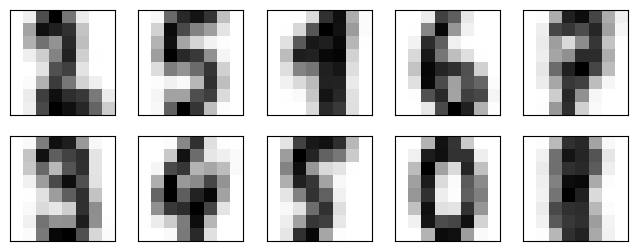

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits.

Next, we shall apply dimensioanlity reduction of MNIST handwritten datasets with PCA

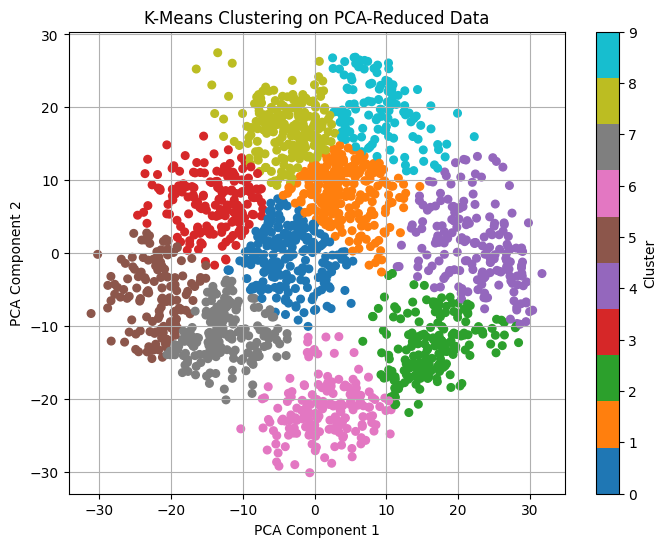

In [5]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Load dataset
digits = load_digits()

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(digits.data)

# Apply KMeans on reduced data
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
clusters = kmeans.fit_predict(reduced_data)

# Plot the clustered data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                      c=clusters, cmap='tab10', s=30)
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


## Question 2. Complete the following lines of code for

Step 1. Dimensionality reduction with PCA. The 8x8=64 dimensional data need to be reduced to 2-dimensional.

Step 2. K-means clustering should be done on the reduced diemnsional data. Initial K value should be set to 10 like before.

Step 3. Visualization code is supplied below.

In [6]:
# data loading
data = digits.data

# PCA dimensionality reduction
model = PCA(n_components=2)
reduced_data = model.fit_transform(data)

# K-Means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(reduced_data)

**Data Visualization**

We shall visualize the reduced diemnsion and cluster data (overlapped) with the help of the following code snippet.

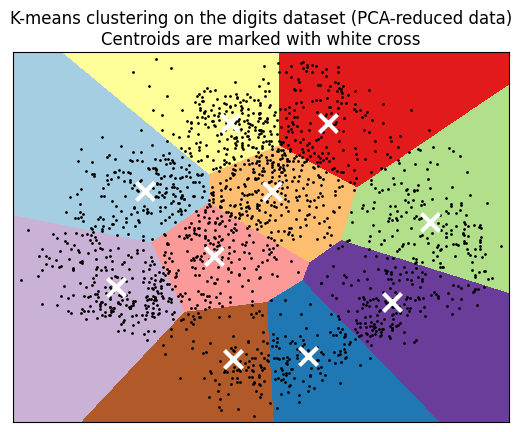

In [7]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
clusters = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
clusters = clusters.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    clusters,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Question 3.

Find a high dimensional dataset of you choice. Show how you load the dataset. Do the basic exploratory data analysis to become familiar with the dataset.



Let’s use the Wine dataset from scikit-learn. It’s a classic high-dimensional dataset with 13 features describing chemical properties of wines from three different cultivars. Here's how you can load it and perform basic exploratory data analysis (EDA):

Step 1: Load the Wine Dataset

In [8]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

# Load the dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add target labels
data['target'] = wine.target

# Display first few rows
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Step 2: Basic Exploratory Data Analysis (EDA)



1.   Shape and Info



In [9]:
print("Dataset shape:", data.shape)
data.info()

Dataset shape: (178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-n



2.   Summary Statistics



In [10]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000




3.   Check for Missing Values



In [11]:
data.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0




4.   Target Distribution



<Axes: title={'center': 'Class Distribution'}, xlabel='target'>

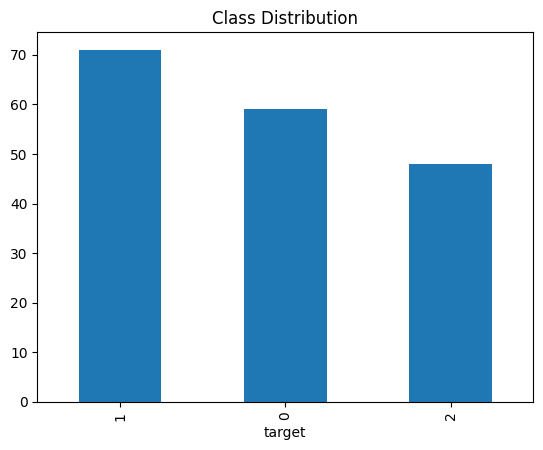

In [12]:
data['target'].value_counts().plot(kind='bar', title='Class Distribution')



5.   Correlation Matrix



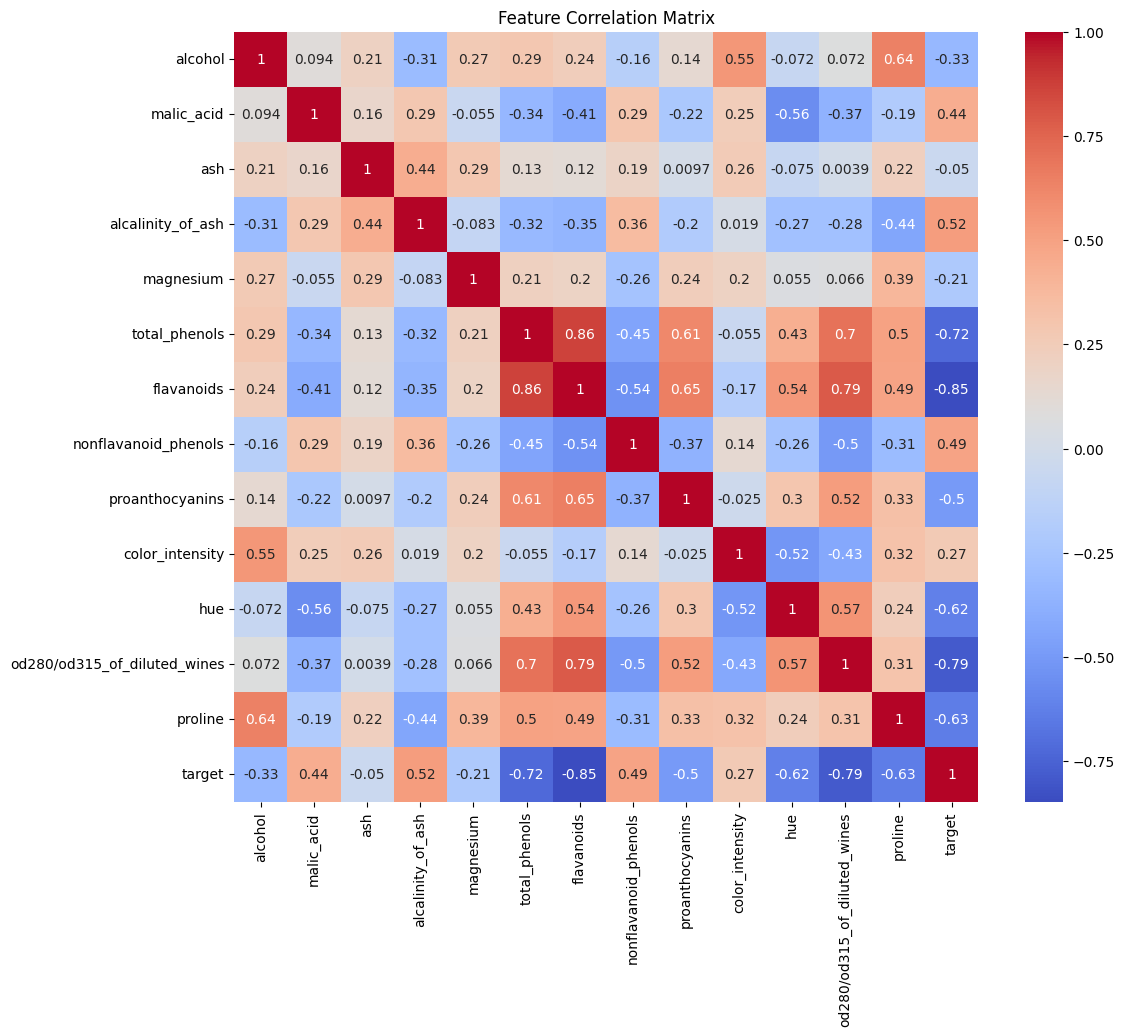

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

We Learn from This

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _


*   The dataset has 13 numerical features and 3 classes.
*   You can identify which features are most correlated.
*   You’ll see how balanced the classes are.
*   No missing values — so it’s clean and ready for modeling.





## Question 4.

Next, the objective would be to reduce the dimension of your dataset and do the clustering on it. Complete the following code for clustering in an object-oriented manner. Do the exact process as above: PCA dimension reduction followed by clustering.

A template code is provided below for your guidance.

```

class YourDataClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.data = ______
        self.labels = ______
        self.kmeans = ______
        self.scaled_data = ______

    def load_data(self):
        """Load the Iris dataset"""
        iris = ________.________()
        self.data = iris.________
        return ________

    def preprocess_data(self):
        """Standardize the dataset"""
        scaler = _________.__________()
        self.scaled_data = scaler.________(________)
        return ________

    def apply_kmeans(self):
        """Apply KMeans clustering"""
        self.kmeans = ________.________(n_clusters=self.n_clusters, random_state=42)
        self.labels = self.kmeans.________(________)
        return ________

    def evaluate_clusters(self):
        """Compute silhouette score"""
        score = ________.________(________, ________)
        print(f"Silhouette Score: {score:.3f}")
        return ________

    def visualize_clusters_matplotlib(self):
        """Visualize clustering result using Matplotlib"""
        plt.scatter(________[:, 0], ________[:, 1], c=________, cmap='viridis')
        plt.title("KMeans Clustering on Iris Dataset (Matplotlib)")
        plt.xlabel("________")
        plt.ylabel("________")
        plt.show()

    def visualize_clusters_opencv(self):
        """Visualize clustering result using OpenCV"""
        canvas = np.ones((______, ______, 3), dtype=np.uint8) * 255
        colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
        scaled = (________[:, :2] * 100 + 250).astype(int)

        for i, point in enumerate(________):
            cv2.circle(canvas, tuple(point), 5, colors[________ % 3], -1)

        cv2.imshow("KMeans Clustering (OpenCV)", ________)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

```

The following code executes all teh parts of teh complete system.

```

  # Step 1: Create clustering object
    clustering = _________(n_clusters=3)

    # Step 2: Load dataset
    data = clustering.________()

    # Step 3: Preprocess dataset
    scaled_data = clustering.________()

    # Step 4: Apply KMeans clustering
    labels = clustering.________()

    # Step 5: Evaluate clusters
    score = clustering.________()

    # Step 6: Visualize with Matplotlib
    clustering.________()

    # Step 7: Visualize with OpenCV
    clustering.________()
  ```

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab.patches import cv2_imshow  # Add this import at the top

class YourDataClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.data = None
        self.labels = None
        self.kmeans = None
        self.scaled_data = None
        self.reduced_data = None

    def load_data(self):
        """Load the Wine dataset"""
        wine = load_wine()
        self.data = wine.data
        return self.data

    def preprocess_data(self):
        """Standardize the dataset"""
        scaler = StandardScaler()
        self.scaled_data = scaler.fit_transform(self.data)
        return self.scaled_data

    def apply_pca(self):
        """Reduce dimensions with PCA"""
        pca = PCA(n_components=2)
        self.reduced_data = pca.fit_transform(self.scaled_data)
        return self.reduced_data

    def apply_kmeans(self):
        """Apply KMeans clustering"""
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        self.labels = self.kmeans.fit_predict(self.reduced_data)
        return self.labels

    def evaluate_clusters(self):
        """Compute silhouette score"""
        score = silhouette_score(self.reduced_data, self.labels)
        print(f"Silhouette Score: {score:.3f}")
        return score

    def visualize_clusters_matplotlib(self):
        """Visualize clustering result using Matplotlib"""
        plt.scatter(self.reduced_data[:, 0], self.reduced_data[:, 1], c=self.labels, cmap='viridis')
        plt.title("KMeans Clustering on Wine Dataset (Matplotlib)")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.show()

    def visualize_clusters_opencv(self):
        """Visualize clustering result using OpenCV (Colab-compatible)"""
        canvas = np.ones((600, 600, 3), dtype=np.uint8) * 255
        colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
        scaled = (self.reduced_data[:, :2] * 100 + 250).astype(int)

        for i, point in enumerate(scaled):
            cv2.circle(canvas, tuple(point), 5, colors[self.labels[i] % 3], -1)

        cv2_imshow(canvas)  # Use this instead of cv2.imshow


Execution Code


Silhouette Score: 0.560


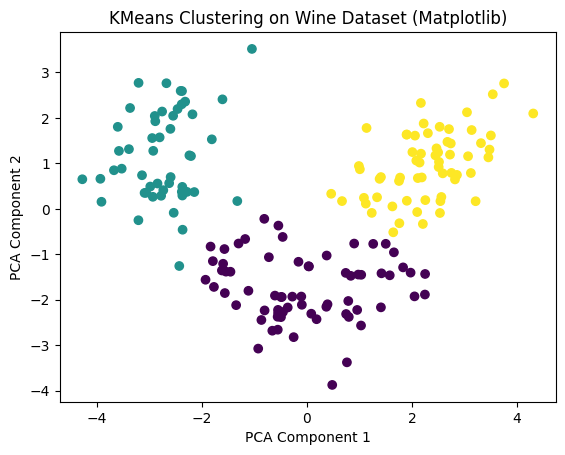

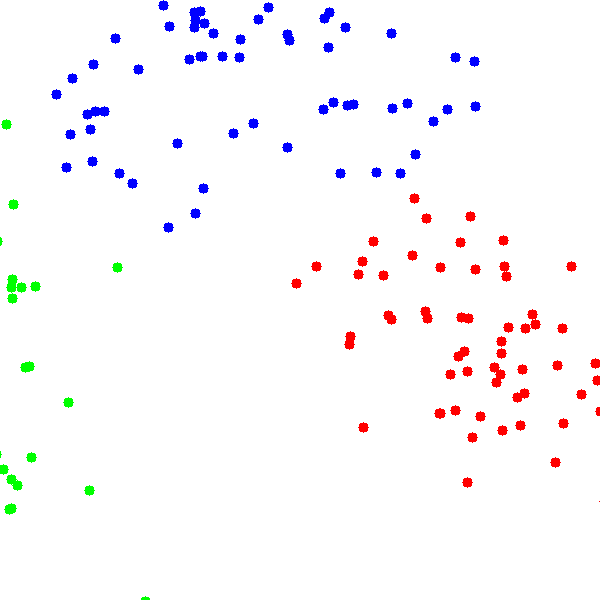

In [15]:

# Step 1: Create clustering object
clustering = YourDataClustering(n_clusters=3)

# Step 2: Load dataset
data = clustering.load_data()

# Step 3: Preprocess dataset
scaled_data = clustering.preprocess_data()

# Step 4: Apply PCA
reduced_data = clustering.apply_pca()

# Step 5: Apply KMeans clustering
labels = clustering.apply_kmeans()

# Step 6: Evaluate clusters
score = clustering.evaluate_clusters()

# Step 7: Visualize with Matplotlib
clustering.visualize_clusters_matplotlib()

# Step 8: Visualize with OpenCV
clustering.visualize_clusters_opencv()